In [1]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import codecs


In [2]:
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding-'latin1')
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [19]:
df.shape

(181691, 16)

In [18]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'City', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Casualities', 'Target',
       'Group', 'Target_type', 'Weapon_type'],
      dtype='object')

In [3]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded
df=df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]

df.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [4]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [5]:
print(f"""
    There are {df.Country.nunique()} countries from {df.Region.nunique()} regions covered in the dataset and terrorist atacks data in {df.Year.nunique()}
    years from {df.Year.min()} to {df.Year.max()}. Overally {df.index.nunique()} terrorist attacks are recorded here which caused about {int(df.Casualities.sum())} casualities
    consisted of {int(df.Killed.sum())} kills and {int(df.Wounded.sum())} wounded.
""")


    There are 205 countries from 12 regions covered in the dataset and terrorist atacks data in 47
    years from 1970 to 2017. Overally 181691 terrorist attacks are recorded here which caused about 872892 casualities
    consisted of 411868 kills and 523869 wounded.



# Yearly Plot

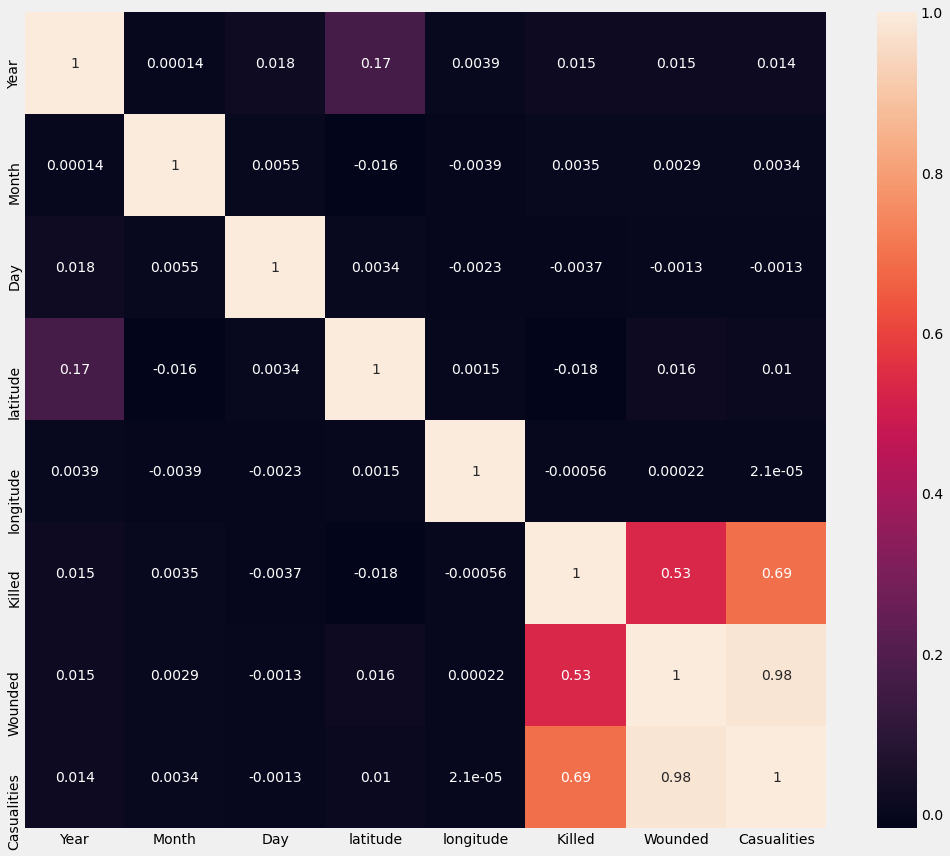

In [20]:
fig,axes = plt.subplots(1,1,figsize=(16,14))
sns.heatmap(df.corr(), annot= True)
plt.show()

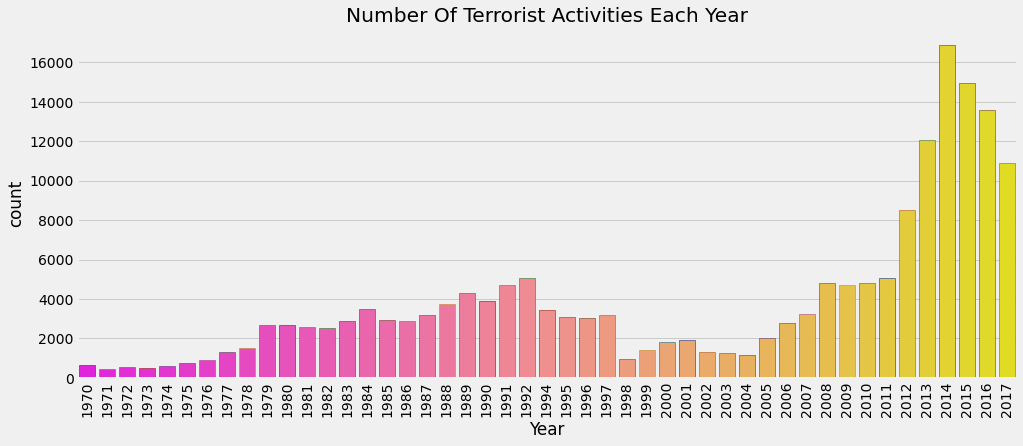

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='spring',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

# Yearly Casualities

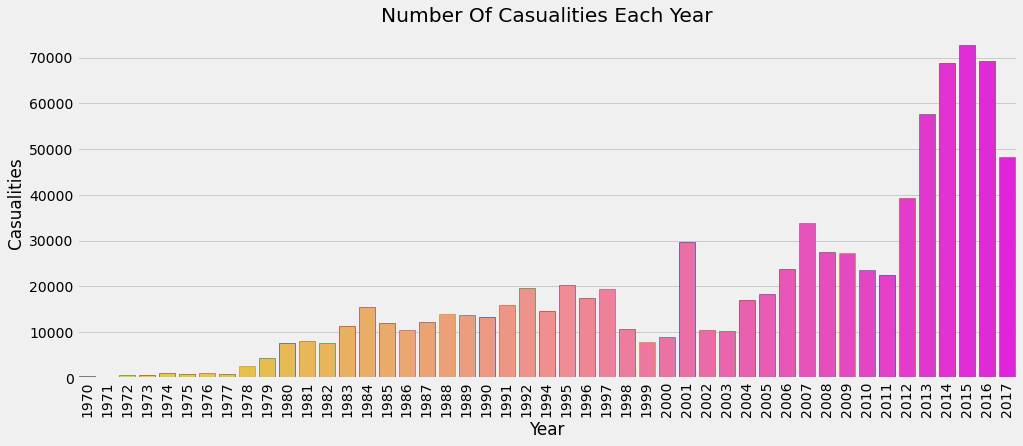

In [15]:
plt.subplots(figsize=(15,6))
year_cas = df.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette='spring_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()

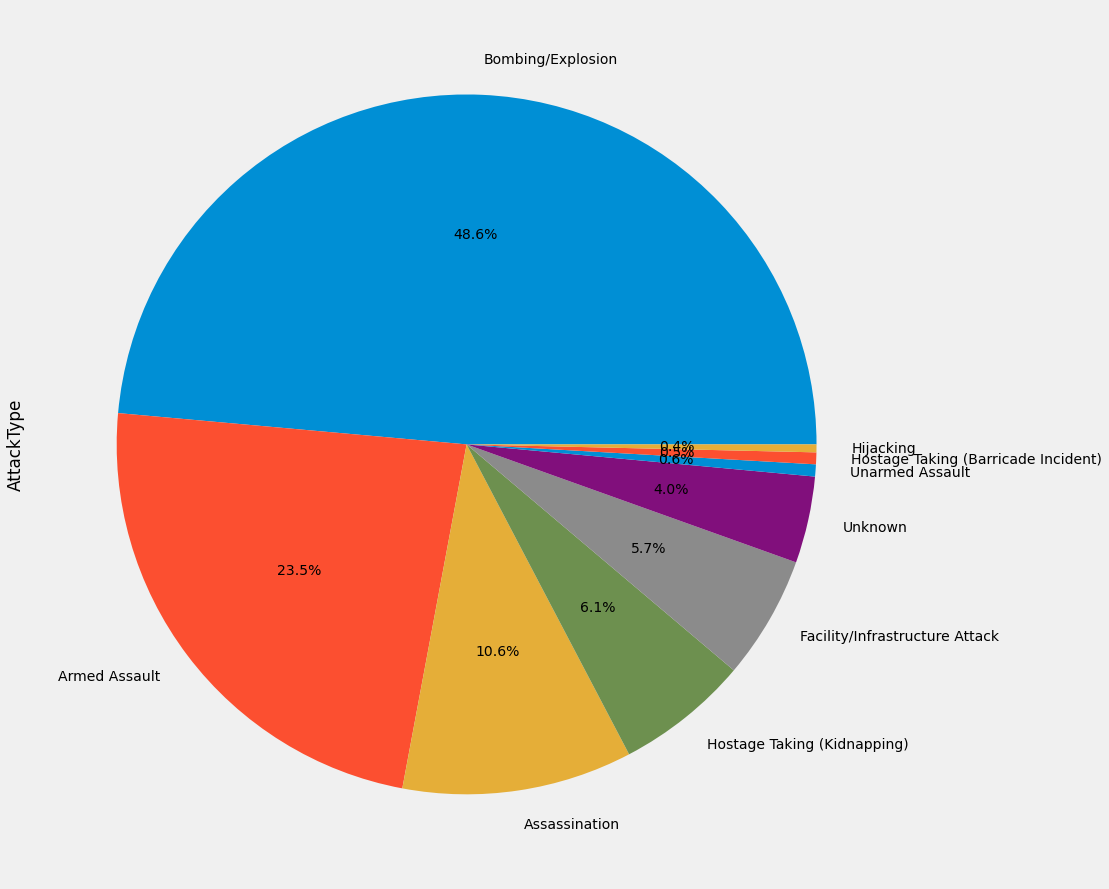

In [22]:
# Pie Plot of AttackTypes
plt.figure(figsize=(15,15))
df['AttackType'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# Number of Total Attacks in Each Country

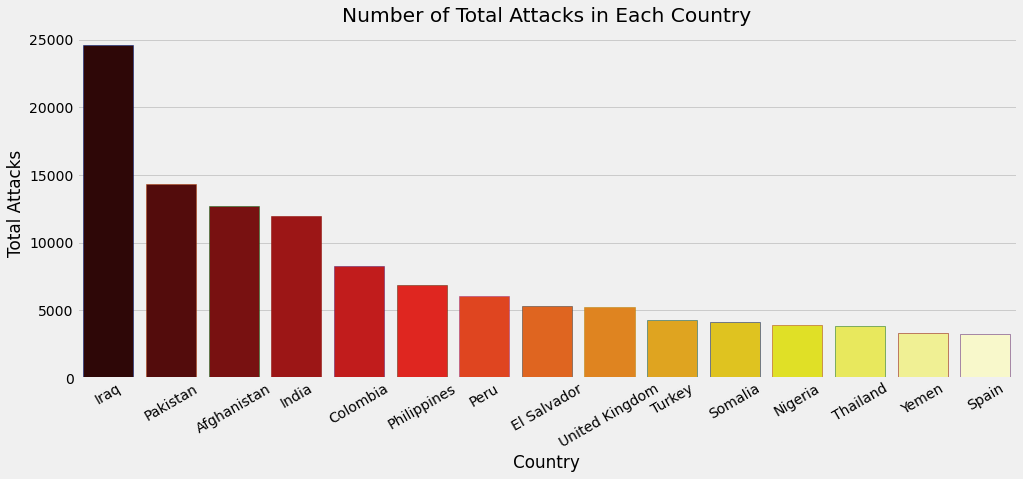

In [10]:
plt.subplots(figsize=(15,6))
country_attacks = df.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'hot',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Attacks in Each Country')
plt.show()

# Number of Total Casualities in Each Country

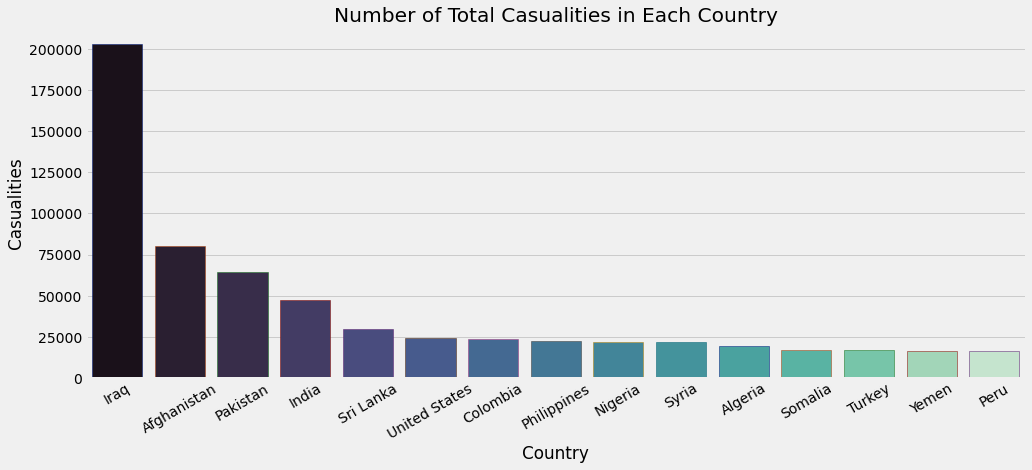

In [12]:
plt.subplots(figsize=(15,6))
count_cas = df.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
sns.barplot(x=count_cas.Country, y=count_cas.Casualities, palette= 'mako',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Casualities in Each Country')
plt.show()

# Number of Total Attacks in Each Region

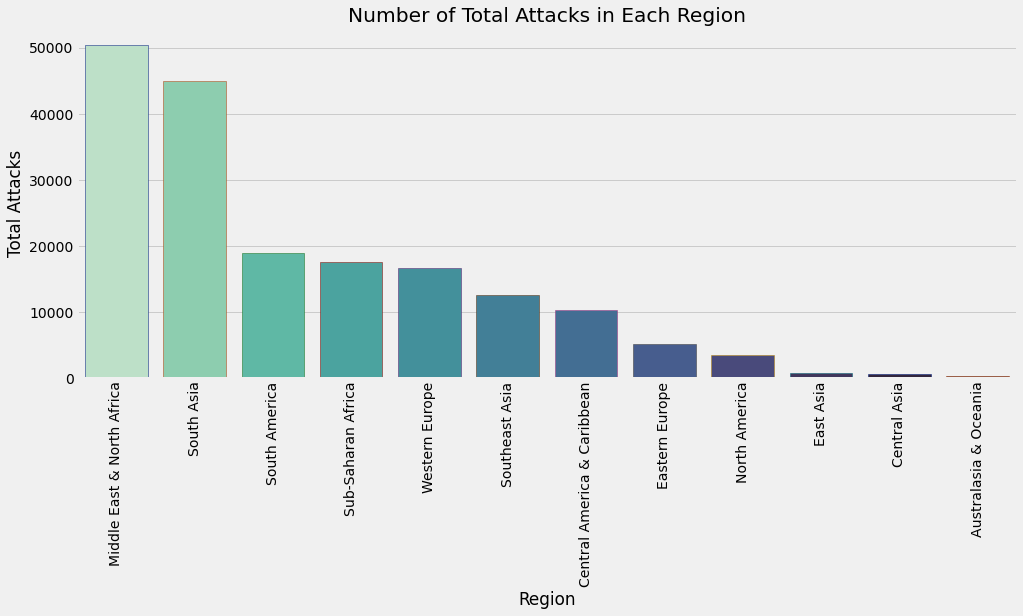

In [13]:
region_attacks = df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='mako_r', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number of Total Attacks in Each Region')
plt.show()

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'Killed'}>],
       [<AxesSubplot:title={'center':'Wounded'}>,
        <AxesSubplot:title={'center':'Casualities'}>, <AxesSubplot:>]],
      dtype=object)

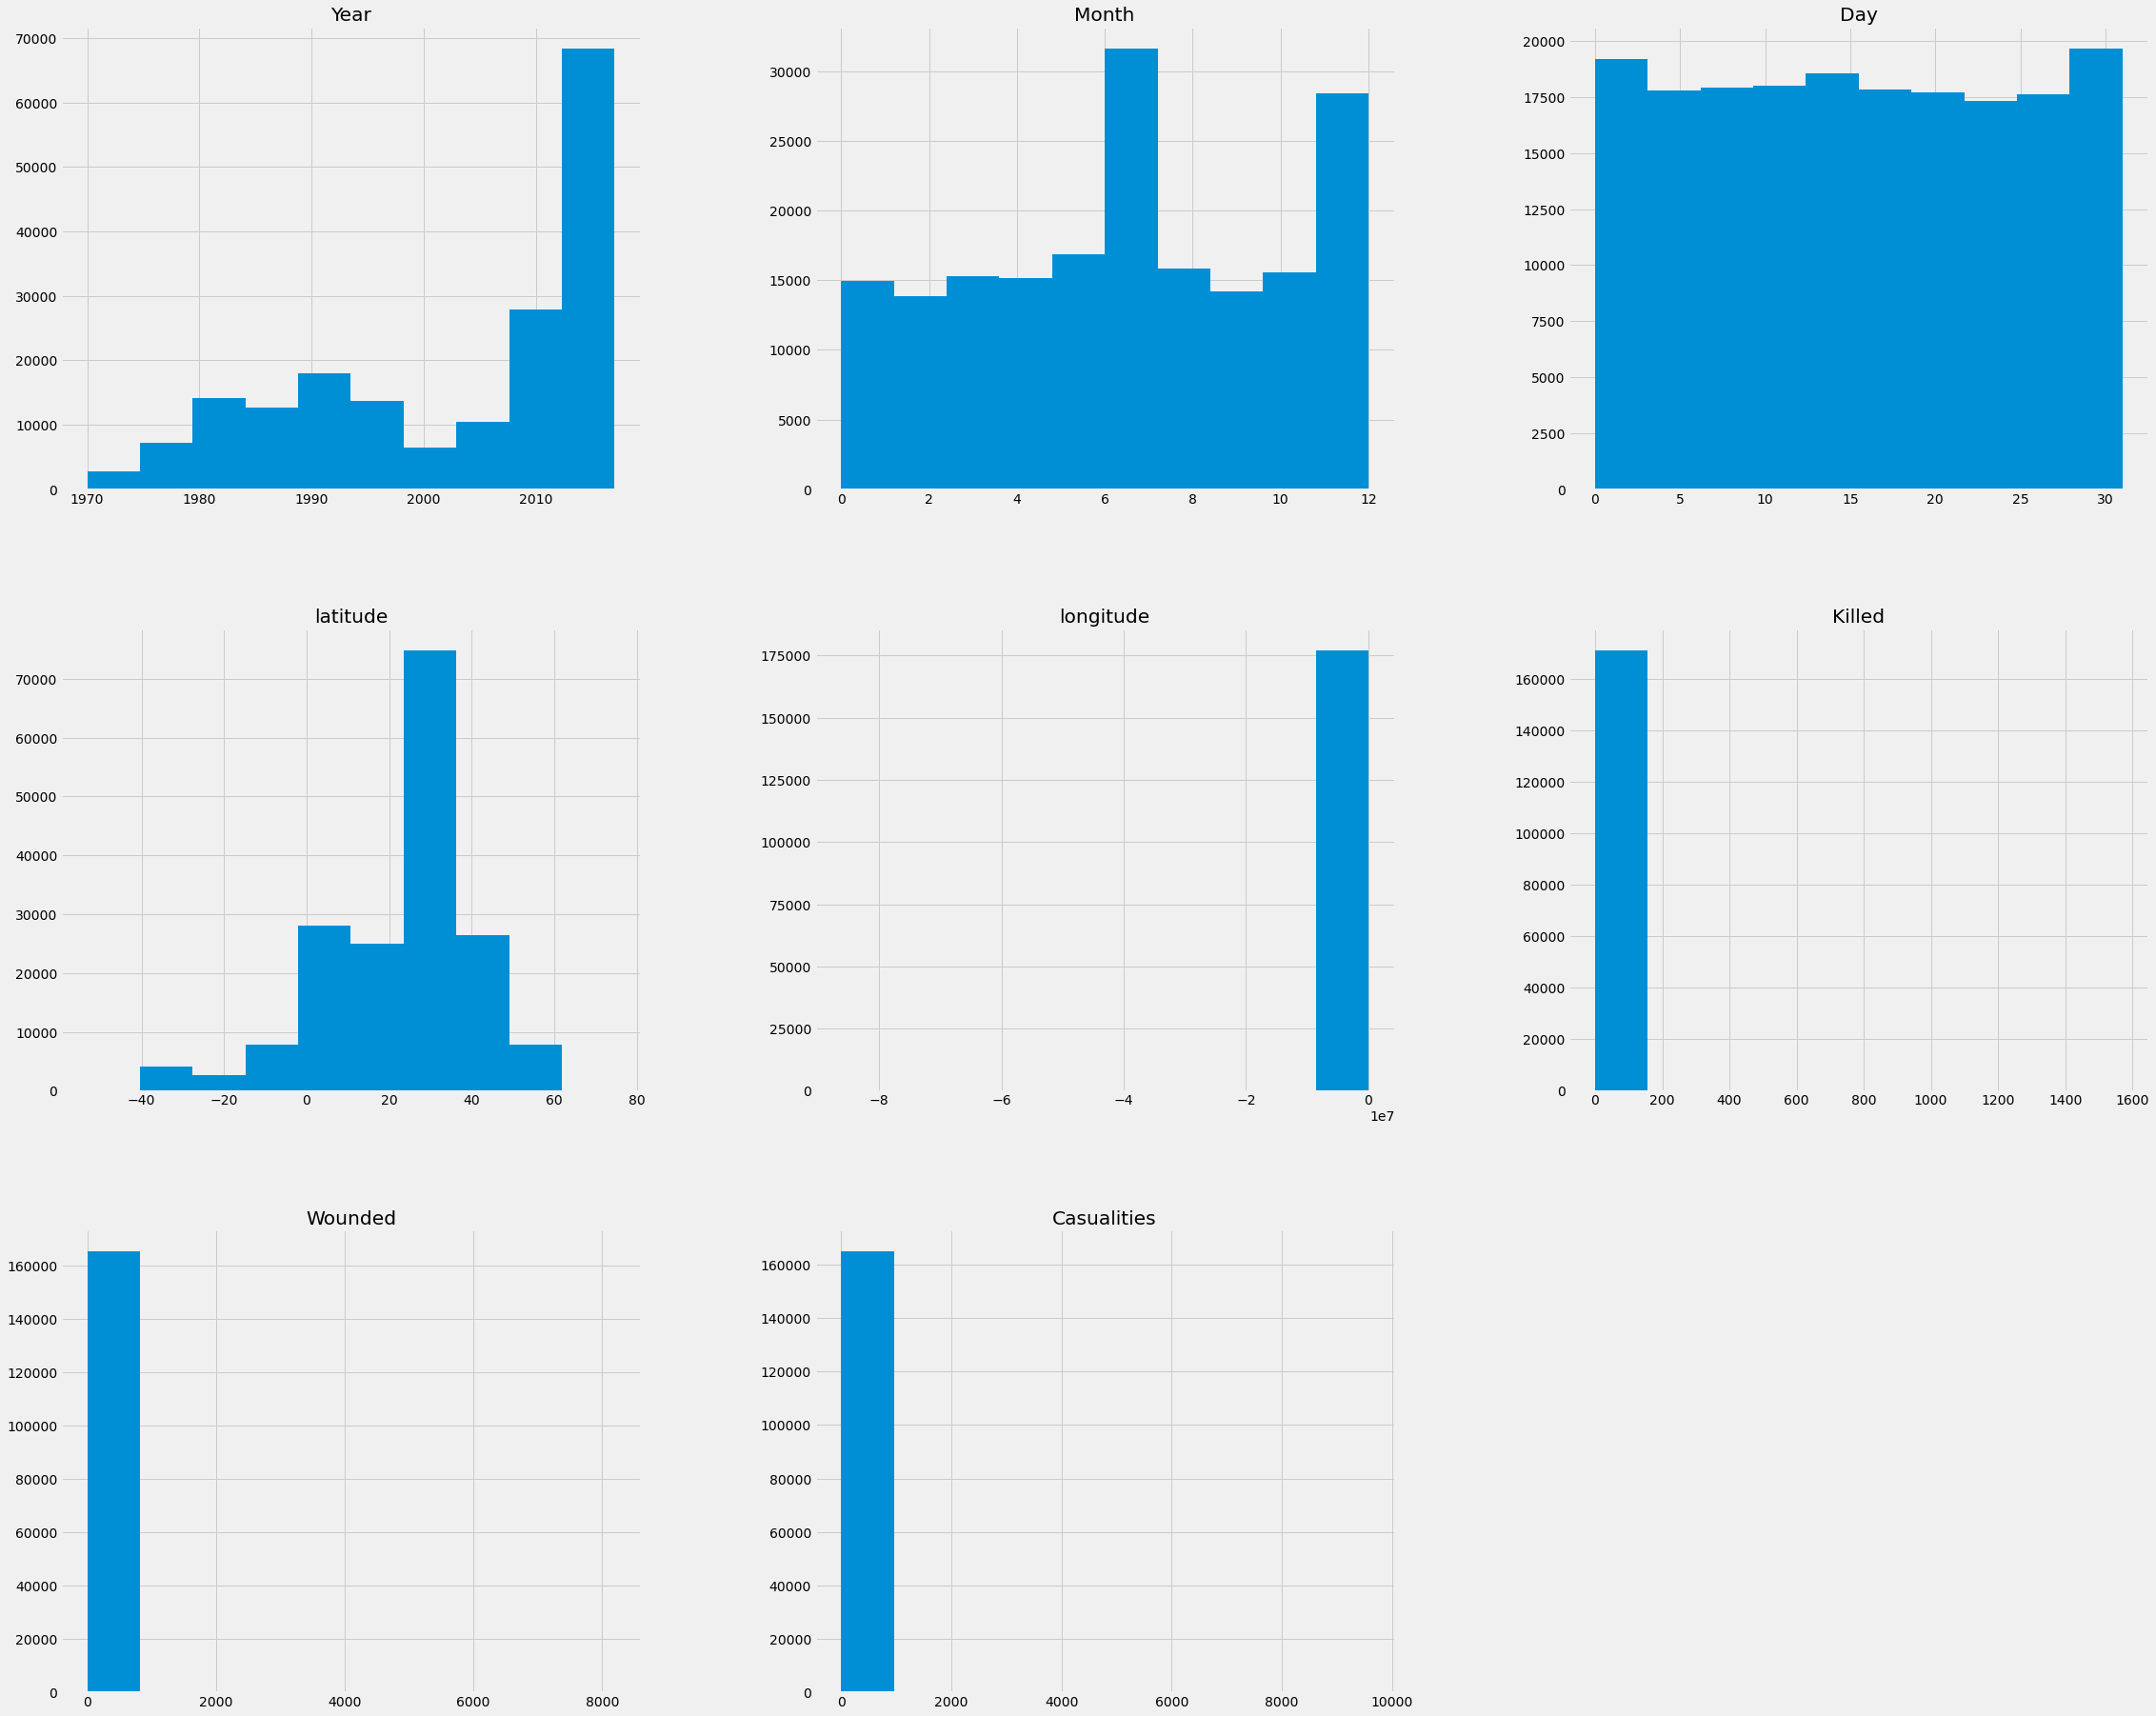

In [27]:
df.hist(figsize=(35,30))